In [11]:
import numpy as np
import pickle
import glob


def pickle_load(path):
    return pickle.load(open(path, 'rb'))


X, y = [], []
user_label = 0
for f in glob.glob('data/raw/keyboard_data_0314/*'):
    for _, raw_sample in pickle_load(f).items():
        channels = [[], [], [], []]
        for sample in raw_sample:
            try:
                segs = [int(x) for x in sample.split(' ') if x != '']
            except:
                continue
            if len(segs) != 2:
                continue
            if segs[0] > 3:
                continue
            channels[segs[0]].append(segs[1])
        
        min_len = min([len(x) for x in channels])
        for i in range(4):
            channels[i] = channels[i][:min_len]
        arr = np.array(channels)
        print(arr.shape)
        X.append(arr.T)
        y.append(user_label)
    user_label += 1

(4, 704)
(4, 240)
(4, 249)
(4, 663)
(4, 222)
(4, 209)
(4, 216)
(4, 218)
(4, 223)
(4, 225)
(4, 223)
(4, 229)
(4, 704)
(4, 223)
(4, 247)
(4, 238)
(4, 218)
(4, 238)
(4, 233)
(4, 237)
(4, 238)
(4, 247)
(4, 242)
(4, 455)
(4, 236)
(4, 176)
(4, 176)
(4, 174)
(4, 149)
(4, 158)
(4, 148)
(4, 165)
(4, 157)
(4, 155)
(4, 422)
(4, 342)
(4, 283)
(4, 305)
(4, 285)
(4, 295)
(4, 292)
(4, 286)
(4, 280)
(4, 276)
(4, 261)
(4, 364)
(4, 207)
(4, 222)
(4, 212)
(4, 234)
(4, 224)
(4, 225)
(4, 216)
(4, 221)
(4, 235)
(4, 245)
(4, 215)
(4, 233)
(4, 225)
(4, 235)
(4, 240)
(4, 232)
(4, 214)
(4, 398)
(4, 278)
(4, 273)
(4, 429)
(4, 519)
(4, 226)
(4, 221)
(4, 224)
(4, 237)
(4, 217)
(4, 208)
(4, 206)
(4, 207)
(4, 207)
(4, 207)
(4, 208)
(4, 311)
(4, 266)
(4, 245)
(4, 238)
(4, 245)
(4, 244)
(4, 244)
(4, 446)
(4, 235)
(4, 227)
(4, 385)
(4, 240)
(4, 224)
(4, 216)
(4, 238)
(4, 251)
(4, 251)
(4, 232)
(4, 271)
(4, 251)
(4, 245)


In [12]:
# we pressed 6 digits, check the valid data
VALID_PRESS_THRESHOLD = 100

def is_valid_sample(X):
    num_flips = 0
    cur_status = False
    flip_pos = []
    for i, x in enumerate((np.sum(X, axis=1) > VALID_PRESS_THRESHOLD).tolist()):
        if x != cur_status:
            cur_status = x
            num_flips += 1
            flip_pos.append(i)
    first_flip = flip_pos[0]
    last_flip = flip_pos[-1]

    # if num_flips >= 12 and num_flips <= 14:
    if num_flips == 12:
        return True, first_flip, last_flip
    return False, None, None

valid_X, valid_y = [], []
for i in range(len(X)):
    ret, fisrt_flip, last_flip = is_valid_sample(X[i])
    if ret:
        valid_X.append(X[i][fisrt_flip:last_flip+1])
        valid_y.append(y[i])

print(f"{len(valid_X)} out of {len(X)} sample is valid")

88 out of 100 sample is valid


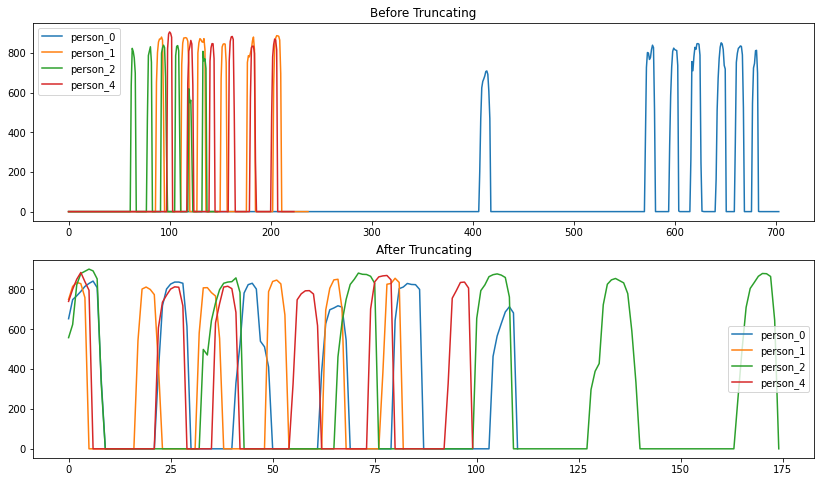

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)

for idx in [0, 20, 30, 50]:
    plt.plot(np.sum(X[idx], axis=1), label=f'person_{y[idx]}')
plt.legend()
_ = plt.title('Before Truncating')

plt.subplot(2,1,2)

for idx in [0,20, 30, 50]:
    plt.plot(np.sum(valid_X[idx], axis=1), label=f'person_{y[idx]}')
plt.legend()
_ = plt.title('After Truncating')

In [18]:
# save data
with open('data/keyboard.pkl', 'wb') as f:
    pickle.dump((valid_X, valid_y), f)